In [1]:
# Importing default Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
import datetime 
import os 

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

# Hi-resolution Plots and Matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Set the maximum number of rows and columns to be displayed
warnings.filterwarnings('ignore')

# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

In [2]:
from gp_patient_survey.params import *
from gp_patient_survey.utils import *
from gp_patient_survey.data import *

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
data = pd.read_csv('../gp_patient_survey/data/data.csv')
data.head(2)

,time,surgery,phone,appointment_time,making_appointment,overall_experience,website,free_text,row_sum,free_text_len,polarity,subjectivity,neg,neu,pos,compound,sentiment,feedback_labelsmake,feedback_labels
0,2024-02-22 12:00:42,Earls Court Surgery,Very easy,Very satisfied,Very good,Very good,Very good,NaN,Very easyVery satisfiedVery goodVery goodVery ...,0,0.0,0.0,0.0,0.0,0.0,0.0,neutral,NaN,NaN
1,2024-02-22 12:01:16,Emperor's Gate Health Centre,Very easy,Very satisfied,Very good,Very good,Very good,NaN,Very easyVery satisfiedVery goodVery goodVery ...,0,0.0,0.0,0.0,0.0,0.0,0.0,neutral,NaN,NaN


In [5]:
response_options = {
    'phone': ['Very easy', 'Fairly easy'],
    'appointment_time': ['Very satisfied', 'Fairly satisfied'],
    'making_appointment': ['Very good', 'Fairly good'],
    'overall_experience': ['Very good', 'Fairly good'],
    'website': ['Very good', 'Fairly good'],
}

In [6]:
# Calculate the percentages for each question and surgery without using aggregate function
percentages = {}

for question, responses in response_options.items():
    # Filter the data for each response option and calculate the percentage
    percentages[question] = data.groupby('surgery')[question].apply(lambda x: (x.isin(responses).sum() / len(x)) * 100)

# Convert the dictionary of percentages to a DataFrame
percentage_df = pd.DataFrame(percentages).reset_index()

# Display the calculated percentages for verification
percentage_df.head()

,surgery,phone,appointment_time,making_appointment,overall_experience,website
0,Earls Court Medical Centre,100.000000,100.000000,100.000000,100.000000,100.000000
1,Earls Court Surgery,97.010870,91.847826,91.847826,93.750000,73.641304
2,Emperor's Gate Health Centre,100.000000,100.000000,100.000000,100.000000,100.000000
3,Health Partners at Violet Melchett,71.159875,72.100313,69.592476,78.683386,56.426332
4,Knightsbridge Medical Centre,78.571429,75.000000,75.000000,85.714286,60.714286


In [7]:
# Count the number of responses for each surgery
response_counts = data['surgery'].value_counts()

# Identify surgeries with less than 5 responses
surgeries_with_few_responses = response_counts[response_counts < 5].index.tolist()

# Set the percentage scores to 0% for surgeries with less than 5 responses
percentage_df.loc[percentage_df['surgery'].isin(surgeries_with_few_responses), response_options.keys()] = 0

# Display the updated dataframe with the adjustments
percentage_df.head()

,surgery,phone,appointment_time,making_appointment,overall_experience,website
0,Earls Court Medical Centre,0.000000,0.000000,0.000000,0.000000,0.000000
1,Earls Court Surgery,97.010870,91.847826,91.847826,93.750000,73.641304
2,Emperor's Gate Health Centre,0.000000,0.000000,0.000000,0.000000,0.000000
3,Health Partners at Violet Melchett,71.159875,72.100313,69.592476,78.683386,56.426332
4,Knightsbridge Medical Centre,78.571429,75.000000,75.000000,85.714286,60.714286


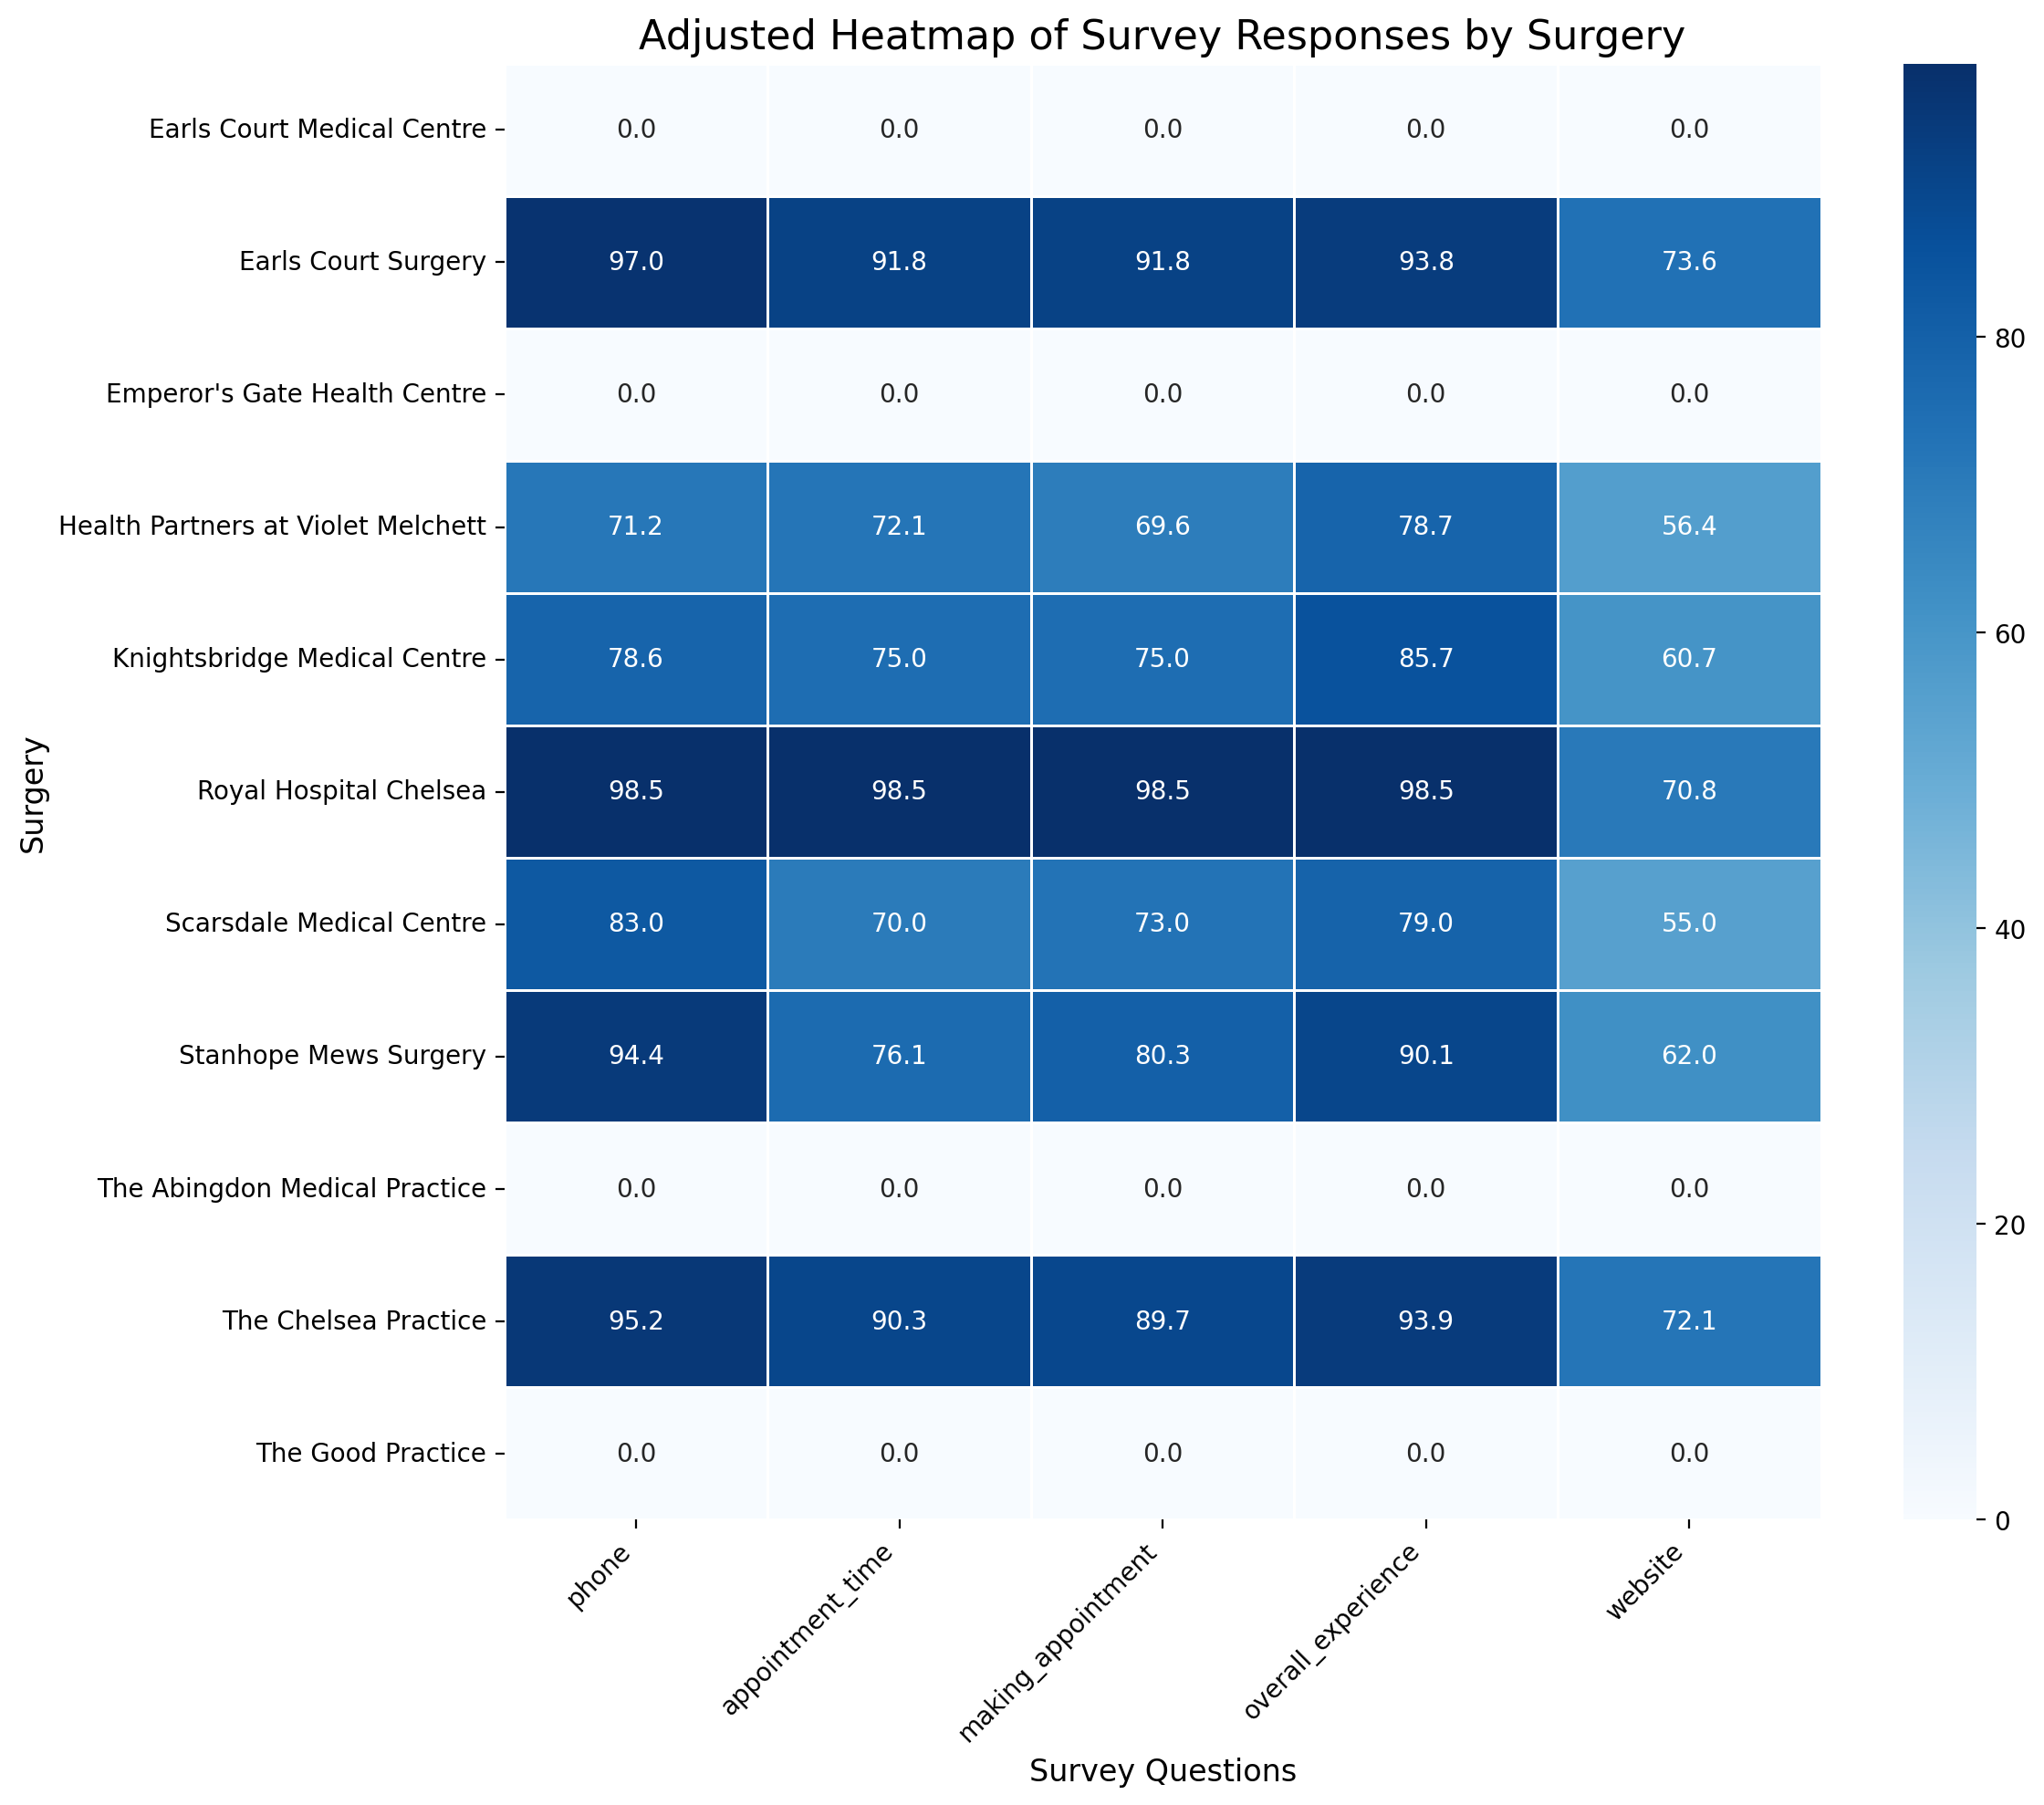

In [9]:
# Draw the updated heatmap with the adjusted percentages
plt.figure(figsize=(12, 10))
sns.heatmap(percentage_df.set_index('surgery'), annot=True, fmt=".1f", linewidths=.5, cmap='Blues')

# Set the titles and labels
plt.title('Adjusted Heatmap of Survey Responses by Surgery', fontsize=16)
plt.xlabel('Survey Questions', fontsize=12)
plt.ylabel('Surgery', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the heatmap
plt.tight_layout()  # Adjust layout to fit everything
plt.show()